<a href="https://colab.research.google.com/github/manish55shukla/AirBnb-Bookings-Analysis/blob/main/Project_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#             **AirBnb Bookings Analysis EDA Project**

---



Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.


In [78]:
#Importing all the libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
%matplotlib inline 

#It enables inline plotting i.e, the plot/graph will be displayed below the cell where the plotting commands are written. 

In [3]:
# Mount the google drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('Airbnb NYC 2019.csv')

In [5]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Find first 3 rows of the DataFrame

df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [8]:
# Find last 3 rows of the DataFrame

df.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [9]:
# Calculate which fields are null in the DataFrame
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
# Sum of all the null fields

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Print the first 10 name, price and corresponding room type of DataFrame

df.loc[0:9, ["name","price",'room_type']]


,name,price,room_type
0,Clean & quiet apt home by the park,149,Private room
1,Skylit Midtown Castle,225,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,150,Private room
3,Cozy Entire Floor of Brownstone,89,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,80,Entire home/apt
5,Large Cozy 1 BR Apartment In Midtown East,200,Entire home/apt
6,BlissArtsSpace!,60,Private room
7,Large Furnished Room Near B'way,79,Private room
8,Cozy Clean Guest Room - Family Apt,79,Private room
9,Cute & Cozy Lower East Side 1 bdrm,150,Entire home/apt


In [12]:
# df.groupby(["room_type"])

df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
# Print first 10 persons of private room having host_id, host_name, neighbourhood having maximum number_of_reviews.

private_rooms = df[df['room_type'] == 'Private room']
list_private_rooms = private_rooms.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name = "number_of_reviews").sort_values(by= ['number_of_reviews'],ascending =False)

list_private_rooms.head(10)

,host_id,host_name,neighbourhood,number_of_reviews
15261,190921808,John,Hell's Kitchen,44
14025,137358866,Kazuya,Woodside,35
16301,238321374,Eyal,Upper West Side,32
15984,224414117,Gabriel,Hell's Kitchen,30
16035,226410657,Nina,Bedford-Stuyvesant,26
16144,230192510,Zach,Fort Greene,25
16386,242962235,Yuval,Ridgewood,23
16539,252604696,Erin,Chelsea,20
15761,216235179,Nina,Bushwick,17
14024,137358866,Kazuya,Sunnyside,17


In [14]:
# FInd out how many unique neighbourhood Erin have

erin_data = df[df['host_name'] == 'Erin']

erin_neighbourhood = erin_data[['host_id','host_name','neighbourhood']]

erin_neighbourhood.head(10)

,host_id,host_name,neighbourhood
888,1644452,Erin,Gramercy
1004,1952186,Erin,Williamsburg
1185,2487319,Erin,Upper West Side
1303,2790324,Erin,Bedford-Stuyvesant
2334,712590,Erin,Prospect Heights
2389,4922378,Erin,Midtown
2577,1673136,Erin,Chelsea
2831,8457613,Erin,Gramercy
3405,10478532,Erin,Hell's Kitchen
4285,3864482,Erin,Greenwich Village


In [15]:
#Find number of room types and mean of the price along with minimum nights
count_room_type = df.groupby('room_type').agg({'room_type':'count','price':'mean','minimum_nights':'min'})

In [16]:
# Count number of groups are there in particular neighbourhood groups. 
neighbourhood_group_name = df.groupby('neighbourhood_group')['name'].count()

In [17]:
#Calculate the mean of reviews per month based on host name alogn with this print neighbourhood group name as well
df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(8)



host_name  neighbourhood_group
Row NYC    Manhattan              18.620000
Nalicia    Queens                 18.126667
Dona       Queens                 13.990000
Aisling    Queens                 13.420000
Malini     Queens                 13.150000
Anabell    Queens                 12.990000
Miss Dy    Queens                 12.840000
Deloris    Queens                 12.480000
Name: reviews_per_month, dtype: float64

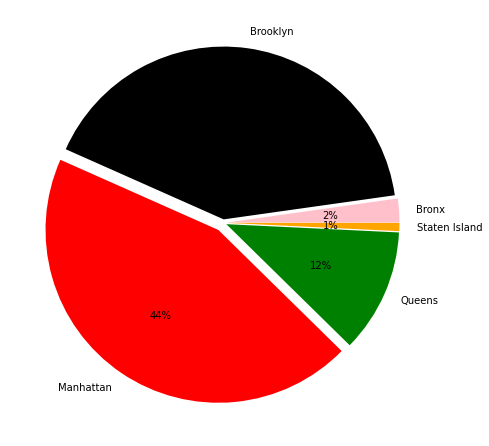

In [18]:



neighbourhood_visualisation = neighbourhood_group_name.rename_axis('name_of_neighbourhood').reset_index(name = 'neighbourhood_count')

lable_name = neighbourhood_visualisation.name_of_neighbourhood
lable_value = neighbourhood_visualisation.neighbourhood_count
# # Defining colors for pie chart
colors = ['pink', 'black', 'red','green', 'orange']
  
# # Define ratio of gap of each fragment in a tuple
explode = (0.02, 0.02, 0.05, 0.02, 0.02)
fig = plt.figure()
ax = fig.add_axes([0.1,0.3,1,2])

ax.pie(lable_value, labels = lable_name, autopct = '%1.0f%%', colors = colors, explode=explode )
plt.show()


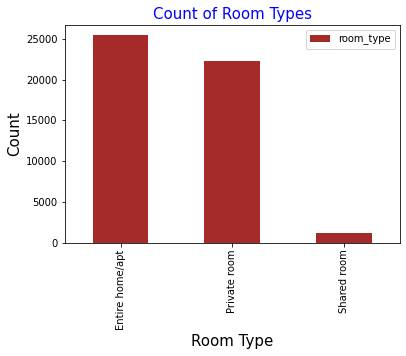

In [112]:
#  Bar graph of type of room and their number of rooms



# Create a bar graph
count_room_type.plot(kind='bar', y='room_type', legend=True, color = 'brown')
plt.xlabel('Room Type', size = 15)
plt.ylabel('Count', size = 15)

# Add a title
plt.title('Count of Room Types', color = 'blue', size = 15)

# Display the graph
plt.show()


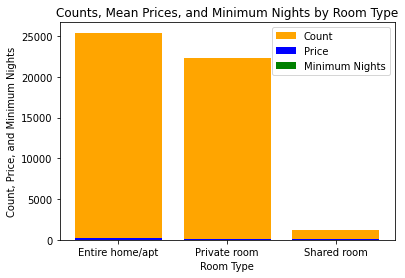

In [119]:
# Create a bar graph with multiple bars per category
fig, ax = plt.subplots()
ax.bar(count_room_type.index, count_room_type['room_type'], color='orange', label='Count')
ax.bar(count_room_type.index, count_room_type['price'], color='blue', label='Price')
ax.bar(count_room_type.index, count_room_type['minimum_nights'], color='green', label='Minimum Nights')

# Add labels and title
ax.set_xlabel('Room Type')
ax.set_ylabel('Count, Price, and Minimum Nights')
ax.set_title('Counts, Mean Prices, and Minimum Nights by Room Type')

# Add a legend for the colors
ax.legend()

# Display the graph
plt.show()


In [55]:
# Print top 8 host name and reviews per month

top_8_hosts = df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(8)
top_8_hosts = top_8_hosts.reset_index()
top_8_hosts

,host_name,neighbourhood_group,reviews_per_month
0,Row NYC,Manhattan,18.620000
1,Nalicia,Queens,18.126667
2,Dona,Queens,13.990000
3,Aisling,Queens,13.420000
4,Malini,Queens,13.150000
5,Anabell,Queens,12.990000
6,Miss Dy,Queens,12.840000
7,Deloris,Queens,12.480000


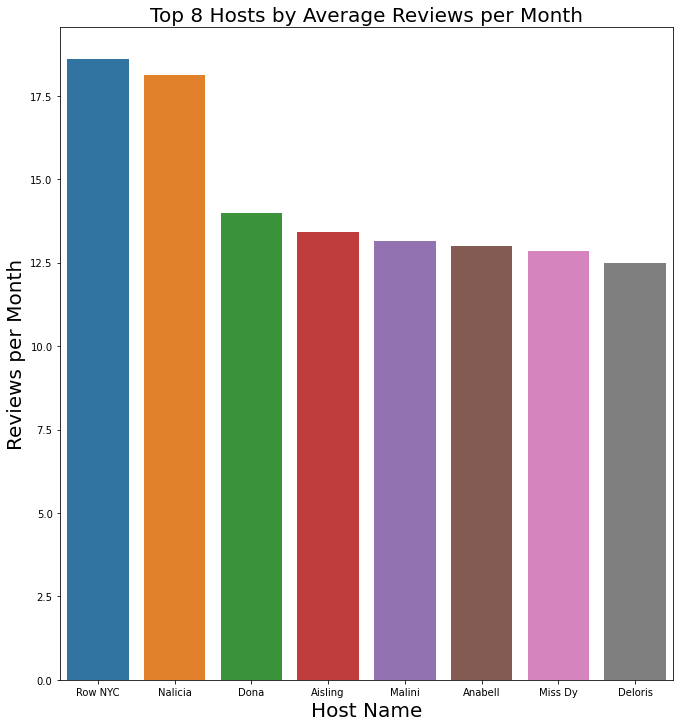

In [158]:

# Create a horizontal bar graph for top 8 host name and reviews per month

# Add labels and title

plt.figure(figsize = (11,12))

sns.barplot(x ='host_name',y = 'reviews_per_month', data = top_8_hosts)
plt.ylabel('Reviews per Month', size = 20)
plt.xlabel('Host Name', size = 20)
plt.title('Top 8 Hosts by Average Reviews per Month', size = 20)

# Display the graph
plt.show()


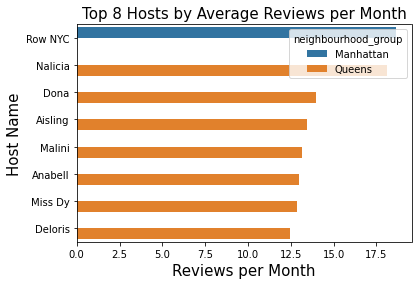

In [221]:

# Create a horizontal bar graph using seaborn
sns.barplot(x="reviews_per_month", y="host_name", hue="neighbourhood_group", data=top_8_hosts.reset_index())

# Add labels and title
plt.xlabel('Reviews per Month', size =15)
plt.ylabel('Host Name', size =15)
plt.title('Top 8 Hosts by Average Reviews per Month', size =15)

# Display the graph
plt.show()


In [120]:
# **bar, scattered, pie, stacked bar, histogram ** 

In [220]:
# Visualise the data in stacked bar -- Print the groups of name and the sum of their reviews in decending order. 


# Create a line plot of the top 15 names with the highest sum of reviews per month

# Assigning the value to name_group_and_review variable

name_group_and_reviews = df.groupby(['name']).agg({'reviews_per_month':'sum'}).sort_values(by = 'reviews_per_month',ascending = False).head(15)

name_group_and_reviews

,reviews_per_month
name,
Enjoy great views of the City in our Deluxe Room!,58.50
Great Room in the heart of Times Square!,27.95
Home away from home,21.08
Lou's Palace-So much for so little,20.94
JFK Comfort.5 Mins from JFK Private Bedroom & Bath,19.75
JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82
JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81
Private Room,16.75
Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22


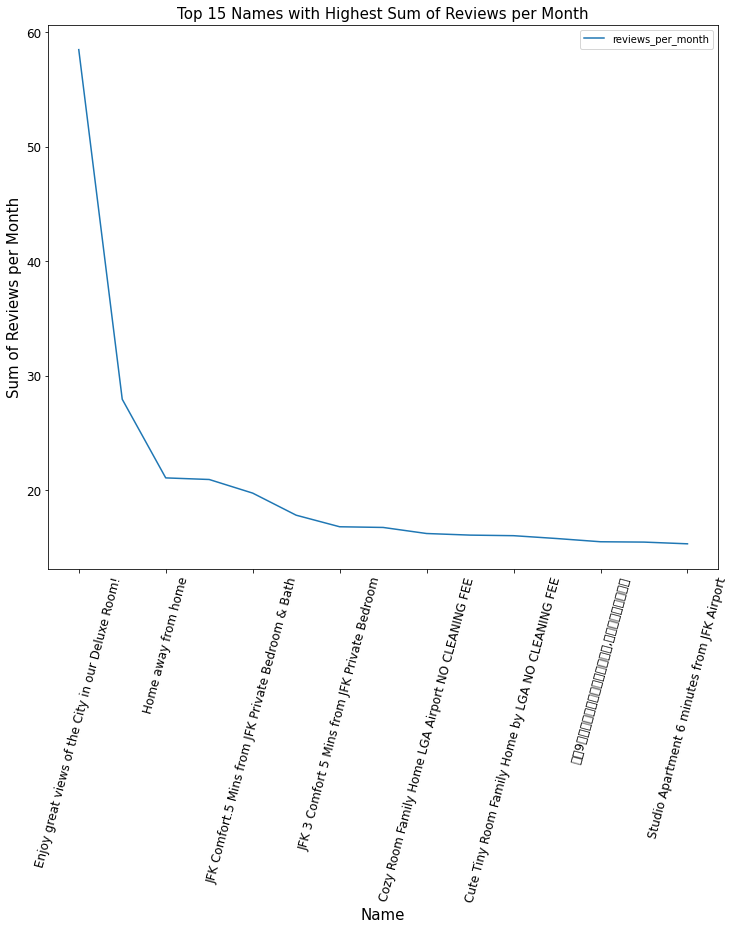

In [223]:
# Visualise the data in stacked bar -- Print the groups of name and the sum of their reviews in decending order.

# Visualization of name_group_and_reviews

name_group_and_reviews.plot(kind='line', figsize=(12, 10), fontsize = 12)

plt.xticks(rotation = 75)

# Add labels and title
plt.title('Top 15 Names with Highest Sum of Reviews per Month', fontsize = 15)
plt.xlabel('Name', fontsize = 15)
plt.ylabel('Sum of Reviews per Month', fontsize = 15)
plt.show()
